In [47]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from glob import glob
from PIL import Image

In [70]:
dfL=pd.DataFrame(glob(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7554/SimpleTest/*'))
dfL

,0
0,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
1,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
2,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
3,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
4,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
5,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
6,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
7,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
8,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
9,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...


In [71]:
dfL.columns=['locations']
dfL['locations']=dfL['locations'].apply(lambda x:np.nan if 'png' in x.lower() else x)
dfL.dropna(inplace =True)

In [72]:
array=np.arange(1,23)
dfL['index']=array
dfL.set_index('index',inplace=True)

In [79]:
url=dfL.iloc[1].locations
df=pd.read_csv(url)
df

,X,Y,Pressure,TiltX,TiltY,Time
0,946.388266543481,798.408130,0.186999,-4447.0,1009.0,00:03.4787405
1,946.862224275321,796.512299,0.190906,-4447.0,1009.0,00:03.4943781
2,946.388266543481,794.774454,0.190417,-4199.0,927.0,00:03.5099814
3,945.598336990415,792.404666,0.223133,-4199.0,927.0,00:03.5256250
4,944.439773645918,789.613581,0.266835,-4199.0,927.0,00:03.5412356
...,...,...,...,...,...,...
1226,1050.02702390576,383.695115,0.555657,-535.0,1786.0,00:36.7040728
1227,1049.71105208454,383.589791,0.532219,-535.0,1786.0,00:36.7197060
1228,1048.65781268045,383.853101,0.286366,-535.0,1786.0,00:36.7197060
1229,Time Elapsed till drawing started: 00:03.4787405,NaN,NaN,NaN,NaN,NaN


In [74]:
df.rename(columns={' X':'X',' Y':'Y',' Pressure':'Pressure',' TiltX':'TiltX',' TiltY':'TiltY',' Time':'Time'},inplace=True)
df.dropna(inplace=True)
df['X']=df['X'].astype(float)

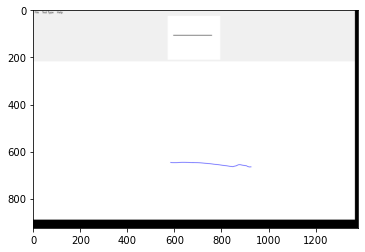

In [75]:
img = Image.open(r'C:\Users\ASUS\Desktop\עבודת גמר\train\7554\SimpleTest\1.png')
plt.imshow(img)

In [76]:
df['Time']=df['Time'].apply(lambda x:float(x.split(':')[1])+float(x.split(':')[0])*60 if(True) else 0)
df['Time']

0      12.609985
1      12.625604
2      12.644568
3      12.660274
4      12.683815
         ...    
127    14.031679
128    14.047287
129    14.062910
130    14.078534
131    14.094146
Name: Time, Length: 132, dtype: float64

In [77]:
def raise_hand(x,y):
    count=0
    for (colname,colval) in x.iteritems():
        if(colname=='Time'):
            for i in range(1,y):
                print(colval.values[i])
                if(colval.values[i]>=colval.values[i-1]+0.1):
                    count=count+1
                    print('i=',i)
            
    return count
    

In [78]:
x=raise_hand(df,len(df['Time']))
x

12.6256038
12.6445684
12.6602735
12.6838147
12.6994898
12.7151659
12.7307903
12.7307903
12.7463215
12.7463215
12.7619382
12.7775712
12.7932666
12.7932666
12.8088942
12.8245277
12.8245277
12.8401502
12.8557643
12.8557643
12.8713968
12.887011
12.887011
12.9026453
12.9182687
12.9338924
12.9495156
12.9495156
12.9651389
12.9807997
12.9807997
12.9964095
13.012001
13.0276329
13.043256
13.043256
13.0588794
13.0588794
13.0745227
13.0745227
13.1058845
13.1058845
13.1213629
13.1369977
13.1526207
13.1526207
13.1682467
13.1682467
13.1879775
13.2036202
13.2192331
13.2348668
13.2348668
13.250491
13.2661068
13.2817377
13.2973911
13.2973911
13.3129743
13.3286959
13.3442218
13.3598526
13.3754787
13.3911169
13.4067143
13.4223374
13.437963
13.4535844
13.4535844
13.4848749
13.4848749
13.5004665
13.5160892
13.5317135
13.5317135
13.5473413
13.5473413
13.5629484
13.5629484
13.5785833
13.5785833
13.5941954
13.5941954
13.60983
13.6254532
13.6254532
13.6410781
13.6410781
13.6566886
13.6566886
13.6723125
13.68798

0

In [44]:
df = pd.DataFrame([[10,6,7,8],
                   [1,9,12,14],
                   [5,8,10,6]],
                  columns = ['a','b','c','d'])

for (colname,colval) in df.iteritems():
    if(colname=='a'):
        for i in range(0,3):
            print(colval.values[i])
    

10
1
5
